## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from numpy import corrcoef

In [3]:
df = pd.read_csv('./FODS-A2.csv')

In [4]:
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,21.20,33.290,19.823333,31.790000,23.463333,38.230000,20.50,31.73,19.200000,39.363333,...,29.230000,9.85,756.183333,41.833333,4.833333,40.0,-2.67,42.017180,42.017180,290
1,21.79,38.500,19.500000,40.633333,22.500000,37.900000,21.00,37.90,20.033333,47.290000,...,40.326667,6.90,754.000000,75.000000,4.000000,40.0,2.80,24.624380,24.624380,50
2,22.39,41.390,20.200000,43.790000,24.500000,39.333333,20.10,38.26,19.390000,48.090000,...,42.060000,10.10,756.433333,68.000000,5.833333,40.0,4.45,3.731260,3.731260,260
3,24.00,30.260,24.390000,26.963333,23.390000,33.400000,22.79,31.20,21.033333,40.626667,...,35.500000,19.10,760.000000,31.000000,4.000000,40.0,1.50,1.058826,1.058826,50
4,20.05,38.245,17.600000,41.000000,21.100000,37.200000,19.89,36.40,18.200000,43.560000,...,38.863333,0.10,754.600000,99.000000,1.000000,32.0,-0.10,39.248108,39.248108,30


In [5]:
df.shape

(7894, 27)

In [6]:
data = df.to_numpy()
f = list(df.columns)

## Functions

In [7]:
def predict(data,params):
    X = data[:,0:-1]
    Y = data[:,[-1]]
    Yhat = np.dot(X,params)
    return Yhat

In [8]:
def norm_train(data):
    X = data[:,1:-1]
    xm = np.mean(X,axis=0)
    xs = np.std(X,axis=0)
    norm_X = np.divide(X-xm,xs)
    norm_data = np.c_[data[:,[0]],norm_X,data[:,[-1]]]
    return norm_data,xm,xs

In [9]:
def norm_test(data,xm,xs):
    X = data[:,1:-1]
    norm_X = np.divide(X-xm,xs)
    norm_data = np.c_[data[:,[0]],norm_X,data[:,[-1]]]
    return norm_data

In [10]:
def Cost(data,params):
    m = len(data)
    X = data[:,0:-1]
    Y = data[:,[-1]]
    
    cost = np.sum((np.dot(X,params) - Y) **2) / (2*m)
    return cost

In [11]:
def grad_desc(data,params,lr=0.01,epochs=1000):
    m = len(data)
    X = data[:,0:-1]
    y = data[:,[-1]]
    J = np.zeros(epochs)
    
    for i in range(epochs):
        delta = np.dot(X.T, (np.dot(X, params) - y))
        params = params - (lr/m)*delta
        J[i] = Cost(data, params)
        
    return params, J

In [12]:
def split(data):
    random.seed(30)
    mm = len(data)
    rangelist = list(range(mm))
    sz = int(len(rangelist)*0.8)
    frac = random.sample(rangelist,sz) 
    rem = [ val for val in rangelist if val not in frac]
    
    data_train = data[frac,:]
    data_test = data[rem,:]
    return data_train,data_test

## 2A) PCA

In [13]:
def calc_pca(n,data):
    X = data[:,0:-1]
    pca = PCA(n_components=n)
    pca.fit(X)
    data_pca = pca.transform(X)
    data_pca = np.concatenate((data_pca,data[:,[-1]]) , axis=1)
    return pca,data_pca

In [14]:
pca_errorlist = []
pca_eigenvals = []
c  = np.ones((len(data),1))
train_errors_pca = []
test_errors_pca = []

In [15]:
for i in range(1,27):
    
    pca,data_pca = calc_pca(i,data)
    eigenvals = list(pca.explained_variance_[0:i])
    data_pca = np.concatenate((c, data_pca), axis = 1)
    
    data_train,data_test = split(data_pca)

    
    params =  np.zeros((data_pca.shape[1] - 1, 1))
    
    data_train,data_train_mean,data_train_std = norm_train(data_train)
    

    params,J_hist = grad_desc(data_train,params,0.01,1000)
    
    train_error = J_hist[-1]
    
    data_test = norm_test(data_test,data_train_mean,data_train_std)
    yhat = predict(data_test,params)
    
    test_error = Cost(data_test,params)
    
    train_errors_pca.append(train_error)
    test_errors_pca.append(test_error)
    
    pca_errorlist.append([i,train_error,test_error])
    pca_eigenvals.append(eigenvals)
    
    
    

Text(0, 0.5, 'Errors')

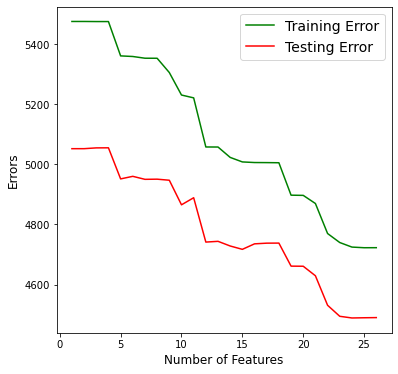

In [16]:
pca_errorlist_np = np.array(pca_errorlist)
plt.figure(figsize=(6,6))
plt.plot(np.arange(1,27,1),pca_errorlist_np[:,[1]],'g')
plt.plot(np.arange(1,27,1),pca_errorlist_np[:,[2]],'r')
plt.legend(["Training Error","Testing Error"],fontsize=14)
plt.xlabel("Number of Features",fontsize=12)
plt.ylabel("Errors",fontsize=12)

In [40]:
for i in range(26):
    print(pca_eigenvals[i])

[1172.1303587214977]
[1172.130358721496, 411.86303325632514]
[1172.1303587214968, 411.863033256327, 157.06750057816092]
[1172.1303587214954, 411.86303325632605, 157.0675005781611, 134.90854249065782]
[1172.1303587214961, 411.86303325632576, 157.06750057816078, 134.9085424906576, 100.74932487064655]
[1172.1303587214982, 411.8630332563265, 157.06750057816092, 134.90854249065865, 100.74932487064666, 67.07988186414622]
[1172.130358721494, 411.86303325632605, 157.06750057816092, 134.90854249065814, 100.74932487064679, 67.0798818641463, 47.702345895294776]
[1172.1303587214968, 411.86303325632474, 157.06750057816103, 134.90854249065825, 100.74932487064662, 67.07988186414636, 47.702345895294805, 11.442906900530783]
[1172.130358721496, 411.86303325632554, 157.06750057816066, 134.9085424906582, 100.74932487064669, 67.07988186414629, 47.70234589529472, 11.442906900532623, 7.751257809201447]
[1172.1303587214952, 411.86303325632633, 157.06750057816092, 134.90854249065777, 100.74932487064633, 67.079

In [17]:
struct = {
    "Features":[],
    "Training Error":[],
    "Testing Error":[]
}
struct1 = {
    "Features":[],
    "Added Feature":[],
    "Training Error":[],
    "Testing Error":[]
}
struct2 = {
    "Features":[],
    "Removed Feature":[],
    "Training Error":[],
    "Testing Error":[]
}

In [18]:
tabl = pd.DataFrame(struct)

In [19]:
tabl.head()

,Features,Training Error,Testing Error


In [20]:
for i in range (1,27):
    tabl.loc[len(tabl.index)] = [i,train_errors_pca[i-1],test_errors_pca[i-1]]
tabl["Features"]=tabl["Features"].astype(int)

In [38]:
tabl.iloc[24,2] = 4488.505689
tabl["Features"]=tabl["Features"].astype(int)

In [39]:
tabl

,Features,Training Error,Testing Error
0,1,5475.654371,5052.185416
1,2,5475.654088,5052.226084
2,3,5475.343905,5054.847665
3,4,5475.321471,5055.106285
4,5,5361.063818,4951.623241
5,6,5359.051785,4960.170946
6,7,5353.334265,4950.168118
7,8,5353.168384,4950.721450
8,9,5305.646494,4947.182701
9,10,5230.810166,4865.377275


## Correlation coefficient

In [23]:
def correlation_coeff(data):
    coeff_org = []
    coeff_abs = []
    for i in range(1,27):
        corr = corrcoef(data[:,i-1],data[:,-1])[0][1]
        coeff_org.append([i,corr])
        coeff_abs.append([i,abs(corr)])
        coeff_sorted = sorted(coeff_abs,key = lambda l:l[1],reverse=True)
        
    return  coeff_sorted,coeff_org

In [24]:
coeffs,coeff_org = correlation_coeff(data)
coeffs[0:5]

[[21, 0.15788804064111284],
 [11, 0.1157990544069468],
 [3, 0.10954237300483136],
 [19, 0.09890810764010086],
 [16, 0.09104028998178089]]

In [25]:
corr_errors = []
corr_f = []
const = np.ones((len(data),1))
train_error_corr=[]
test_error_corr=[]

In [26]:
for n in range(1, 27): # n denote number of features to select
    cols = []
    for i in range(n):
        cols.append(coeffs[i][0] - 1)
    
    feat = [f[i] for i in cols]
    corr_f.append(feat)
        
    corr_data = data[:,cols]
    corr_data = np.concatenate((corr_data, data[:,[-1]]), axis=1)
    corr_data = np.concatenate((const, corr_data), axis = 1)
    
    data_train, data_test = split(corr_data)
    
    params = np.zeros((corr_data.shape[1] - 1, 1))
    
    data_train, train_mean, train_std = norm_train(data_train)
#     print("data_train shape = ",data_train.shape," and params shape = ",params.shape," for i =  ",n,"\n")
        
    params, J_history = grad_desc(data_train, params, 0.01, 10**3)
    
    training_error = J_history[-1]
    
    data_test = norm_test(data_test, train_mean, train_std)
    yhat = predict(data_test, params)
    testing_error = Cost(data_test, params)
    
    train_error_corr.append(training_error)
    test_error_corr.append(testing_error)
    
    corr_errors.append([n, training_error, testing_error]) 

In [42]:
corr_f

[['RH_out'],
 ['RH_out', 'T6'],
 ['RH_out', 'T6', 'T2'],
 ['RH_out', 'T6', 'T2', 'T_out'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed', 'RH_6'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed', 'RH_6', 'T3'],
 ['RH_out', 'T6', 'T2', 'T_out', 'RH_8', 'Windspeed', 'RH_6', 'T3', 'RH_1'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7',
  'RH_9'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7',
  'RH_9',
  'T1'],
 ['RH_out',
  'T6',
  'T2',
  'T_out',
  'RH_8',
  'Windspeed',
  'RH_6',
  'T3',
  'RH_1',
  'RH_2',
  'RH_7',
  'RH_9',
  'T1',
  '

Text(0, 0.5, 'Errors')

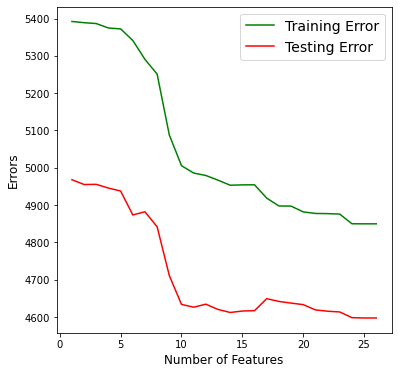

In [27]:
corr_errorlist_np = np.array(corr_errors)
plt.figure(figsize=(6,6))
plt.plot(np.arange(1,27,1),train_error_corr,'g')
plt.plot(np.arange(1,27,1),test_error_corr,'r')
plt.legend(["Training Error","Testing Error"],fontsize=14)
plt.xlabel("Number of Features",fontsize=12)
plt.ylabel("Errors",fontsize=12)

In [28]:
tabl_corr = pd.DataFrame(struct)
for i in range (1,27):
    tabl_corr.loc[len(tabl_corr.index)] = [i,train_error_corr[i-1],test_error_corr[i-1]]
tabl_corr["Features"]=tabl_corr["Features"].astype(int)

In [29]:
tabl_corr

,Features,Training Error,Testing Error
0,1,5392.077838,4967.930218
1,2,5388.817170,4955.096793
2,3,5386.477544,4955.532293
3,4,5374.603599,4945.543095
4,5,5372.142246,4937.695277
5,6,5341.200797,4873.496885
6,7,5290.486931,4882.054223
7,8,5250.898773,4841.766744
8,9,5087.954803,4711.029068
9,10,5005.559605,4633.737856


## Greedy Forward

In [30]:
gf_errors = []
index_list = []
const = np.ones((len(data), 1))

In [31]:
for i in range(26):
    errors_list = []
    
    for j in range(26):
        if j not in index_list:
            curr_data = data[:,index_list]
            curr_data = np.concatenate((const, curr_data), axis = 1)
            curr_data = np.concatenate((curr_data, data[:,[j]]), axis=1)
            curr_data = np.concatenate((curr_data, data[:,[-1]]), axis=1)
            
            data_train, data_test = split(curr_data)
    
            params = np.zeros((curr_data.shape[1] - 1, 1))

            data_train, train_mean, train_std = norm_train(data_train)
            params, J_history = grad_desc(data_train, params, 0.01, 1000)

            training_error = J_history[-1]

            data_test = norm_test(data_test, train_mean, train_std)
            y_pred = predict(data_test, params)
            testing_error = Cost(data_test, params)
    
            errors_list.append([j, training_error, testing_error])
        
    errors_list_sorted = sorted(errors_list, key=lambda l:l[2], reverse=False)
    
    index_list.append(errors_list_sorted[0][0])
    gf_errors.append(errors_list_sorted[0])    

In [32]:
gf_errors

tabl_gf = pd.DataFrame(struct1)
for i in range (1,27):
    tabl_gf.loc[len(tabl_gf.index)] = [i,gf_errors[i-1][0],gf_errors[i-1][1],gf_errors[i-1][2]]
tabl_gf["Added Feature"]=tabl_gf["Added Feature"].astype(int)
tabl_gf["Features"]=tabl_gf["Features"].astype(int)
tabl_gf # 4748.353294572027

,Features,Added Feature,Training Error,Testing Error
0,1,20,5392.077838,4967.930218
1,2,1,5304.342724,4889.173640
2,3,15,5172.559943,4770.770469
3,4,3,5095.793821,4706.768766
4,5,21,5080.034470,4666.519017
5,6,13,5049.287448,4650.363744
6,7,9,5046.613559,4637.309002
7,8,4,5042.536145,4621.239581
8,9,16,4891.113792,4566.271486
9,10,8,4882.812588,4558.296966


## Greedy Backward

In [33]:
gb_errors = []
index_list = [x for x in range(0,26)]
const = np.ones((len(data), 1))

In [34]:
for i in range(26):

    if i == 0:
        curr_data = data[:,index_list]
        curr_data = np.concatenate((const, curr_data), axis = 1)
        curr_data = np.concatenate((curr_data, data[:,-1].reshape(-1,1)), axis=1)            

        data_train, data_test = split(curr_data)

        params = np.zeros((curr_data.shape[1] - 1, 1))

        data_train, train_mean, train_std = norm_train(data_train)
        params, J_history = grad_desc(data_train, params, 0.01, 1000)

        training_error = J_history[-1]

        data_test = norm_test(data_test, train_mean, train_std)
        y_pred = predict(data_test, params)
        testing_error = Cost(data_test, params)
        
        gb_errors.append([-1, training_error, testing_error])

    else:
        errors_list = []

        for j in range(26):
            
            if j in index_list:
                new_index_list = index_list.copy()
                new_index_list.remove(j)

                curr_data = data[:,new_index_list]
                curr_data = np.concatenate((const, curr_data), axis = 1)
                curr_data = np.concatenate((curr_data, data[:,-1].reshape(-1,1)), axis=1)            

                data_train, data_test = split(curr_data)

                params = np.zeros((curr_data.shape[1] - 1, 1))

                data_train, train_mean, train_std = norm_train(data_train)
                params, J_history = grad_desc(data_train, params, 0.01, 1000)

                training_error = J_history[-1]

                data_test = norm_test(data_test, train_mean, train_std)
                y_pred = predict(data_test, params)
                testing_error = Cost(data_test, params)

                errors_list.append([j, training_error, testing_error])

        errors_list_sorted = sorted(errors_list, key=lambda l:l[2], reverse=False)

        index_list.remove(errors_list_sorted[0][0])
        gb_errors.append(errors_list_sorted[0])   

In [35]:
gb_errors

tabl_gb = pd.DataFrame(struct2)
for i in range (1,27):
    tabl_gb.loc[len(tabl_gb.index)] = [27-i,gb_errors[i-1][0]+1,gb_errors[i-1][1],gb_errors[i-1][2]]
tabl_gb["Removed Feature"]=tabl_gb["Removed Feature"].astype(int)
tabl_gb["Features"]=tabl_gb["Features"].astype(int)
tabl_gb.iloc[0,1] = "None"
tabl_gb

,Features,Removed Feature,Training Error,Testing Error
0,26,None,4849.703079,4597.400973
1,25,6,4864.491532,4564.096335
2,24,18,4868.703670,4552.990027
3,23,21,4866.027645,4544.133250
4,22,3,4856.736365,4536.685359
5,21,13,4857.992906,4530.239615
6,20,12,4862.206326,4527.174716
7,19,19,4861.397596,4525.455910
8,18,25,4861.398261,4525.463329
9,17,7,4861.220203,4525.521450
